In [293]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [188]:
eps = 0.5
n = 10
d = 2
iter_max = 1000

def U(x):
    return x[0] * np.eye(2) + x[1] * sigma1 + x[2] * sigma2 + x[3] * sigma3

def X(eps):
    r = np.random.uniform(low=-0.5,high=0.5,size=4)
    x0 = np.sign(r[0]) * np.sqrt(1-eps**2)
    x = eps * r[1:]/np.linalg.norm(r[1:])
    return x0 * np.eye(2) + 1j * (x[0] * sigma1 + x[1] * sigma2 + x[2] * sigma3)

def compress(R):
    a, b = R[0,0], R[0,1]
    x0 = np.real(a)
    x3 = np.imag(a)
    x2 = np.real(b)
    x1 = np.imag(b)
    return np.array([x0,x1,x2,x3])

def boundary(U_ls):
    U_ls[:,n-1,:,:] = U_ls[:,0,:,:]
    U_ls[:,:,n-1,:] = U_ls[:,:,0,:]
    
def increment(coord,mu):
    diff = np.zeros(2)
    diff[abs(mu)-1] = np.sign(mu)
    return ((coord + diff) % n).astype(int)

def metropolis(beta):
    i = 0
    U_ = np.random.uniform(low=-1,high=1,size=(4,n,n,4))
    for k in range(n):
        for l in range(n):
            for m in range(2):
                U_[m,k,l,:] = U_[m,k,l,:]/np.linalg.norm(U_[m,k,l,:])
    boundary(U_)
    mu_rand = np.random.randint(low=0,high=2,size=iter_max)
    t_rand = np.random.randint(low=0,high=n,size=iter_max)
    x_rand = np.random.randint(low=0,high=n,size=iter_max)
    r = np.random.uniform(size=iter_max)

    while i < iter_max:
        t,x = t_rand[i],x_rand[i]
        coord = np.array([t,x])
        mu = mu_rand[i]
        U_chosen = U_[mu,t,x,:]
        U_new = X(eps).dot(U(U_chosen))
        U_new_comp = compress(U_new)
        A = 0
        for nu in range(2):
            coord1 = increment(coord,mu+1)
            if nu != mu:
                coord3 = increment(coord,nu+1)
                coord4 = increment(coord,-nu-1)
                coord5 = increment(increment(coord,mu),-nu-1)
                U1 = U(U_[nu,coord1[0],coord1[1],:])
                U2 = np.conjugate(U(U_[mu,coord3[0],coord3[1],:])).T
                U3 = np.conjugate(U(U_[nu,t,x,:])).T
                U4 = np.conjugate(U(U_[nu,coord5[0],coord5[1],:])).T
                U5 = np.conjugate(U(U_[mu,coord4[0],coord4[1],:])).T
                U6 = U(U_[nu,coord4[0],coord4[1],:])
                P = np.dot(U1,np.dot(U2,np.dot(U3,np.dot(U4,np.dot(U5,U6)))))
                A += P
        ds = -beta/2 * np.real(((U(U_chosen)-U_new).dot(A)).trace())
        if r[i] <= np.exp(-ds):
            U_[mu,t,x,:] = U_new_comp
            boundary(U_)
        i +=1
    return U_

In [189]:
def S_meas(U_ls):
    S = 0
    for t in range(n):
        for x in range(n):
            coord = np.array([t,x])
            for mu in range(2):
                for nu in range(2):
                    if mu < nu:
                        coord1 = increment(coord,mu+1)
                        coord2 = increment(coord,nu+1)
                        U1 = U(U_ls[mu,t,x,:])
                        U2 = U(U_ls[nu,coord1[0],coord1[1],:])
                        U3 = np.conjugate(U(U_ls[mu,coord2[0],coord2[1],:])).T
                        U4 = np.conjugate(U(U_ls[nu,t,x,:])).T
                        S += np.real(U1.dot(U2.dot(U3.dot(U4))).trace())
    return 2 * beta * S

betas = np.linspace(0,10,100)
energy_ls = []
my_list = range(len(betas))

for item in tqdm(my_list):
    time.sleep(0.1)
    arr = np.zeros(100)
    for j in range(100):
        arr[j] = S_meas(metropolis(betas[i]))
    energy_ls.append(arr.mean())

 45%|██████████████████▉                       | 45/100 [25:01<29:36, 32.31s/it]/var/folders/c7/_nlmffn91z9864jmkznb7mx9hx_pfj/T/ipykernel_76952/2068797864.py:72: RuntimeWarning: overflow encountered in exp
  if r[i] <= np.exp(-ds):
100%|█████████████████████████████████████████| 100/100 [55:59<00:00, 33.59s/it]


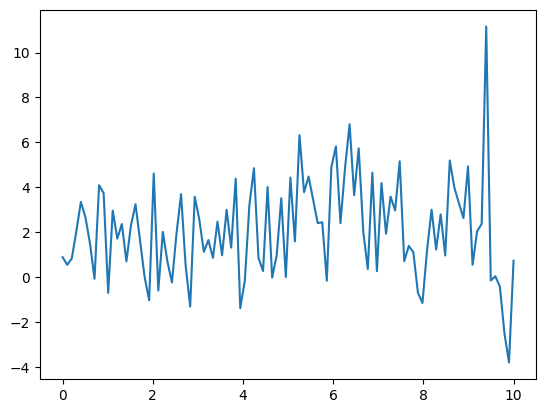

In [190]:
energy_arr = np.array(energy_ls)

plt.plot(betas,energy_arr)
plt.show()

#temperature = 1/betas
#temperature = temperature[::-1]

#plt.plot(temperature,energy_arr[::-1]/betas**3)
#plt.show()

#capacity = -betas[1::]**2 * np.diff(energy_arr)/np.diff(betas)

#plt.plot(betas[1::],capacity)
#plt.show()

In [60]:
np.floor(np.array([1.2,3.5]))

array([1., 3.])

In [187]:
increment(np.array([1,2]),0)

array([1, 2])

 16%|██████▋                                   | 16/100 [00:05<00:28,  2.92it/s]/var/folders/c7/_nlmffn91z9864jmkznb7mx9hx_pfj/T/ipykernel_76952/3551092994.py:86: RuntimeWarning: overflow encountered in exp
  acceptance_prob = min(1, np.exp(action_before - action_after))
100%|█████████████████████████████████████████| 100/100 [00:38<00:00,  2.60it/s]


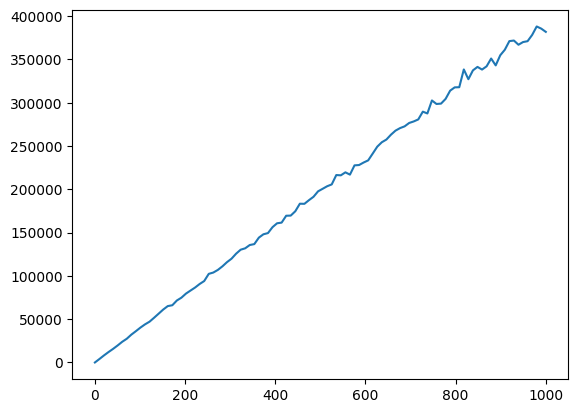

In [305]:
import numpy as np

sigma1 = np.array([[0,1],[1,0]])
sigma2 = np.array([[0,-1j],[1j,0]])
sigma3 = np.array([[1,0],[0,-1]])

# Constants
N = 10  # Lattice size
n_iterations = 10  # Number of Monte Carlo iterations
betas = np.linspace(0,1000,100)
energies = []

# Define the action function
def calculate_action(lattice,beta):
    # Calculate the plaquette term in the action
    action_plaquette = 0.0
    for i in range(N):
        for j in range(N):
            plaq = np.matmul(lattice[i, j, 0], lattice[(i + 1) % N, j, 1])
            plaq = np.matmul(plaq, np.conj(lattice[i, (j + 1) % N, 0]).T)
            plaq = np.matmul(plaq, np.conj(lattice[i, j, 1]).T)
            action_plaquette += np.real(2 - np.trace(plaq))

    # Calculate the total action
    return 2 * beta * action_plaquette

def X(eps):
    r = np.random.uniform(low=-1/2,high=1/2,size=4)
    x0 =  np.sqrt(1 + np.sign(r[0])*eps**2)
    x = eps * r[1:]/np.linalg.norm(r[1:])
    return x0 * np.eye(2) + 1j * (x[0] * sigma1 + x[1] * sigma2 + x[2] * sigma3)

energy_max = 10

# Perform the Monte Carlo simulation

for ind in tqdm(range(len(betas))):
    beta = betas[ind]
    #time.sleep(0.1)
    energy_sum = 0.0
    for _ in range(energy_max):
        
        
        # Initialize lattice with random SU(2) matrices
        lattice = np.zeros((N, N, 2, 2, 2), dtype=np.complex128)
        xvals = np.random.uniform(low=-10,high=10,size=(N,N,2,4))
        for i in range(N):
            for j in range(N):
                for k in range(2):
                    xvec = xvals[i,j,k]
                    xvec = xvec/np.linalg.norm(xvec)
                    arr = xvec[0] * np.eye(2) + 1j * (xvec[1] * sigma1 + xvec[2] * sigma2 + xvec[3] * sigma3)
                    #lattice[i, j] = np.random.rand(2, 2) - 0.5
                    #lattice[i, j] /= np.linalg.norm(lattice[i, j])
                    lattice[i,j,k] = arr
                
        # Apply periodic boundary conditions
        lattice[0, :, :] = lattice[N-1, :, :]
        lattice[:,0, :] = lattice[:, N-1, :]            

        action_before = calculate_action(lattice,beta)
        
        for _ in range(n_iterations):
    
            # Choose a random lattice site and direction
            i = np.random.randint(N)
            j = np.random.randint(N)
            k = np.random.randint(2)

            # Generate a random SU(2) matrix
            su2_matrix = X(0.5)
        
            new_lattice = lattice.copy()

            # Update the gauge field at the chosen site
            new_lattice[i, j, k] = np.matmul(su2_matrix, new_lattice[i, j, k])
        
            # Apply periodic boundary conditions
            new_lattice[0, :, :] = new_lattice[N-1, :, :]
            new_lattice[:,0, :] = new_lattice[:, N-1, :]

            # Calculate the action after the update
            action_after = calculate_action(new_lattice,beta)

            # Calculate the Metropolis acceptance probability
            acceptance_prob = min(1, np.exp(action_before - action_after))

            # Decide whether to accept or reject the update
            if np.random.random() < acceptance_prob:
                # Accept the update
                lattice = new_lattice
                action_before = action_after
                
        energy_sum += calculate_action(lattice,beta)

    # Calculate the expectation value of the energy
    expectation_value = energy_sum / energy_max
    energies.append(expectation_value)

plt.plot(betas,energies)

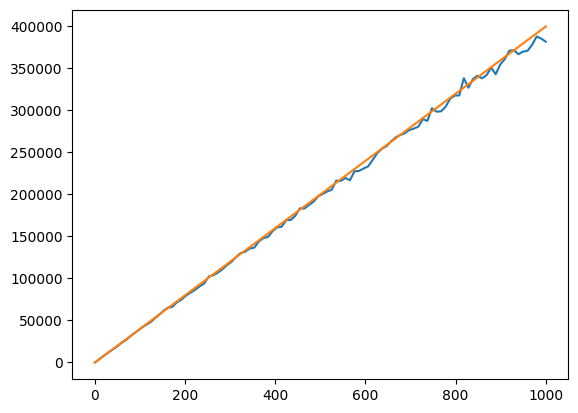

In [306]:
plt.plot(betas,energies)
plt.plot(betas,2*10**2*2*betas)

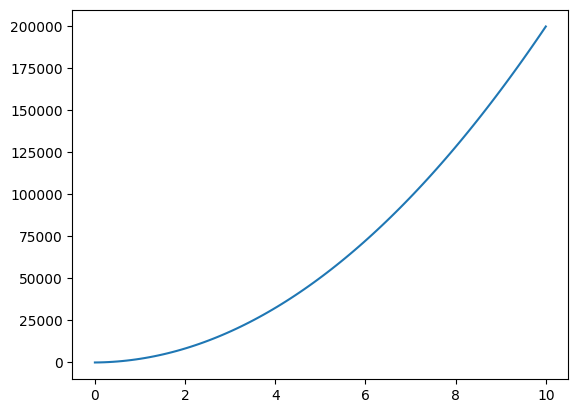

In [203]:
plt.plot(betas,energies)

In [248]:
arr1 = np.eye(2)
arr2 = arr1.copy()
arr2[0,0] = 24
arr2

array([[24.,  0.],
       [ 0.,  1.]])